<a href="https://colab.research.google.com/github/athenaap/data_science_hw/blob/main/Homework8V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Clear widget states when done
from IPython.display import display, clear_output
clear_output(wait=True)

Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

In [10]:
#Q2 and Q3 is below
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      30 non-null     float64
 1   V2      30 non-null     float64
 2   V3      30 non-null     float64
 3   V4      30 non-null     float64
 4   V5      30 non-null     float64
 5   V6      30 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


In [2]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA()
pca.fit(X_scaled)

# Results
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance:", np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.39747021 0.30295205 0.16145572 0.07131525 0.05138315 0.01542362]
Cumulative Variance: [0.39747021 0.70042226 0.86187798 0.93319323 0.98457638 1.        ]


In [4]:
# Variance by each component
print(pca.explained_variance_ratio_)

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained:", cumulative_variance)

[0.39747021 0.30295205 0.16145572 0.07131525 0.05138315 0.01542362]
Cumulative Variance Explained: [0.39747021 0.70042226 0.86187798 0.93319323 0.98457638 1.        ]


In [5]:
# Create a loading matrix
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)

# Display loadings
print("Factor Loadings:")
print(loadings)

# Suggested factor names based on high-loading variables
if abs(loadings.loc['V1','PC1']) > 0.5 and abs(loadings.loc['V3','PC1']) > 0.5:
    print("\nPC1 might represent: 'Oral Health Importance'")
if abs(loadings.loc['V2','PC2']) > 0.5 and abs(loadings.loc['V6','PC2']) > 0.5:
    print("PC2 might represent: 'Aesthetic Appeal'")

Factor Loadings:
         PC1       PC2       PC3       PC4       PC5       PC6
V1 -0.300180 -0.614344 -0.183474 -0.105313  0.277200  0.640999
V2  0.503715 -0.263534 -0.084629  0.695009  0.418370 -0.107646
V3 -0.363633 -0.570766 -0.194627  0.038606 -0.200211 -0.680105
V4  0.526215 -0.210514 -0.044580 -0.709880  0.344015 -0.233493
V5  0.158218  0.195328 -0.940028 -0.012959 -0.214732  0.082966
V6  0.471167 -0.380642  0.188827  0.016849 -0.737283  0.231489


In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
#Check that there are no missing data
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [44]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

In [45]:
#Q2(30 pt)-Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Data loading
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')  # Load your dataset
df = df.drop(columns=['Prospect ID', 'Lead Number'])

# Data cleaning
def clean_data(df):
    # Handle infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill missing values
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

df = clean_data(df)

# Split into features and target
y = df['Converted']
X = df.drop(columns=['Converted'])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [52]:
from pycaret.classification import *

# Combine train data for PyCaret
train_data = pd.concat([X_train, y_train], axis=1)

# Setup with error handling
try:
    clf1 = setup(
        data=train_data,
        target='Converted',
        session_id=42,
        normalize=True,
        transformation=False,  # Disable if causing issues
        remove_multicollinearity=False,  # Disable if causing issues
        fix_imbalance=True,
    )

    # Model comparison
    best_model = compare_models(sort='F1', n_select=1)

    # Final model
    final_model = finalize_model(best_model)

    # Predictions
    predictions = predict_model(final_model, data=X_test)

    # Evaluation
    eval(y_test, predictions['prediction_label'])

except Exception as e:
    print("Error occurred:", str(e))
    print("\nDebugging info:")
    print("X_train dtypes:", X_train.dtypes)
    print("Numeric columns stats:")
    print(X_train.select_dtypes(include=['float64', 'int64']).describe())

,Description,Value
0,Session id,42
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(6468, 35)"
4,Transformed data shape,"(7517, 155)"
5,Transformed train set shape,"(5576, 155)"
6,Transformed test set shape,"(1941, 155)"
7,Numeric features,5
8,Categorical features,29
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9293,0.9762,0.9091,0.9073,0.9081,0.8507,0.8508,2.5130
lightgbm,Light Gradient Boosting Machine,0.9291,0.9773,0.9046,0.9107,0.9074,0.8500,0.8502,2.3370
xgboost,Extreme Gradient Boosting,0.9291,0.9763,0.9028,0.9124,0.9073,0.8499,0.8503,1.7100
rf,Random Forest Classifier,0.9273,0.9711,0.8879,0.9205,0.9037,0.8454,0.8460,1.5170
et,Extra Trees Classifier,0.9258,0.9672,0.8879,0.9166,0.9019,0.8422,0.8427,1.7240
lr,Logistic Regression,0.9229,0.9680,0.9155,0.8876,0.9012,0.8381,0.8384,1.7440
ada,Ada Boost Classifier,0.9192,0.9675,0.8913,0.8977,0.8945,0.8289,0.8290,1.3090
ridge,Ridge Classifier,0.9150,0.9684,0.9132,0.8717,0.8918,0.8218,0.8226,0.8350
lda,Linear Discriminant Analysis,0.9150,0.9684,0.9132,0.8717,0.8918,0.8218,0.8226,0.8110
svm,SVM - Linear Kernel,0.9079,0.9572,0.8925,0.8713,0.8816,0.8062,0.8067,0.9110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Error occurred: Length of values (7968) does not match length of index (6468). This usually happens when transformations that drop rows aren't applied on all the columns.

Debugging info:
X_train dtypes: Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            objec

In [ ]:
#Q3(30 pt)-Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [1]:
!pip install autogluon

No path specified. Models will be saved in: "AutogluonModels/ag-20250429_143126"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.02 GB / 12.67 GB (71.2%)
Disk Space Avail:   61.87 GB / 107.72 GB (57.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

Accuracy: 0.9397546897546898
Precision: 0.9325095057034221
Recall: 0.9108635097493036


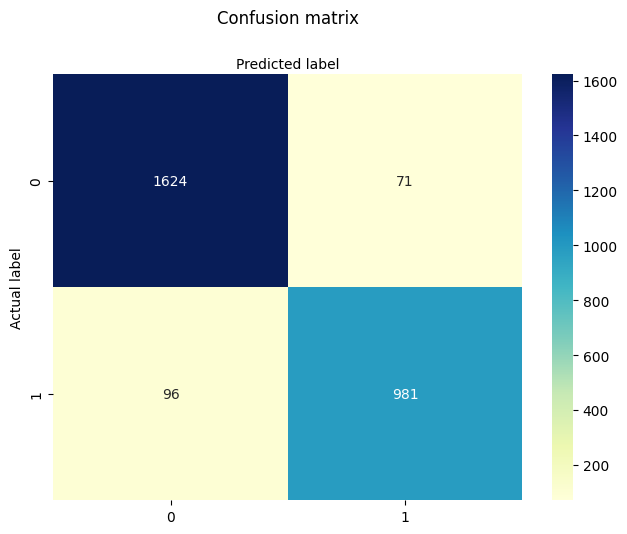


Model Leaderboard:


These features in provided data are not utilized by the predictor and will be ignored: ['Magazine', 'Newspaper Article', 'X Education Forums', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
Computing feature importance via permutation shuffling for 26 features using 2772 rows with 5 shuffle sets...


                   model  score_test  score_val eval_metric  pred_time_test  \
0      LightGBMXT_BAG_L1    0.921559   0.920315          f1        1.517496   
1    WeightedEnsemble_L3    0.921559   0.920315          f1        1.519537   
2    WeightedEnsemble_L2    0.921559   0.920315          f1        1.520441   
3      LightGBMXT_BAG_L2    0.921275   0.919094          f1        2.510619   
4        LightGBM_BAG_L1    0.921201   0.918125          f1        0.686417   
5  KNeighborsUnif_BAG_L1    0.611168   0.604103          f1        0.026985   
6  KNeighborsDist_BAG_L1    0.598674   0.591098          f1        0.027245   

   pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.670033   57.433147                 1.517496                0.670033   
1       0.678231   58.771866                 0.002041                0.008198   
2       0.677027   57.968337                 0.002945                0.006994   
3       1.435063  156.506124               

	208.51s	= Expected runtime (41.7s per shuffle set)
	205.77s	= Actual runtime (Completed 5 of 5 shuffle sets)


                                               importance    stddev  \
Tags                                             0.274186  0.004631   
Total Time Spent on Website                      0.042586  0.001923   
Lead Profile                                     0.039679  0.004975   
Last Notable Activity                            0.034695  0.004066   
City                                             0.031118  0.003820   
Asymmetrique Activity Score                      0.016745  0.003813   
Lead Quality                                     0.015046  0.002738   
Last Activity                                    0.013123  0.002061   
What is your current occupation                  0.006773  0.000719   
Page Views Per Visit                             0.003684  0.001995   
Asymmetrique Profile Index                       0.002907  0.001603   
A free copy of Mastering The Interview           0.001970  0.001350   
Do Not Email                                     0.001932  0.000895   
Asymme

In [14]:
from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Rename your evaluation function to avoid conflict
def evaluate_model(yact, ypred):
    print("Accuracy:", metrics.accuracy_score(yact, ypred))
    print("Precision:", metrics.precision_score(yact, ypred))
    print("Recall:", metrics.recall_score(yact, ypred))

    cnf_matrix = metrics.confusion_matrix(yact, ypred)
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()



# AutoGluon Model Training
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

predictor = TabularPredictor(
    label='Converted',
    eval_metric='f1'
).fit(
    train_data=train_data,
    time_limit=300,
    presets='best_quality',
    verbosity=2
)

# Make predictions
y_pred = predictor.predict(X_test)

# Evaluate using renamed function
evaluate_model(y_test, y_pred)

# Additional analysis
print("\nModel Leaderboard:")
print(predictor.leaderboard(test_data))

print("\nFeature Importance:")
print(predictor.feature_importance(test_data))